# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [ ]:
# mount with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# LOAD DATA

df = pd.read_csv('/content/drive/MyDrive/Datasets/Creditcard/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info

<bound method DataFrame.info of             Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]>

In [ ]:
#Checking Missing Values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Or we can check missing values through this 

df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
df.shape

(284807, 31)

In [ ]:
# lets explore the valid and fraud transections


fraud = df[df['Class']==1]
valid = df[df['Class']!=1]
print(f'Fraud transections: {len(fraud)}')
print(f'Valid transections: {len(valid)}')

Fraud transections: 492
Valid transections: 284315


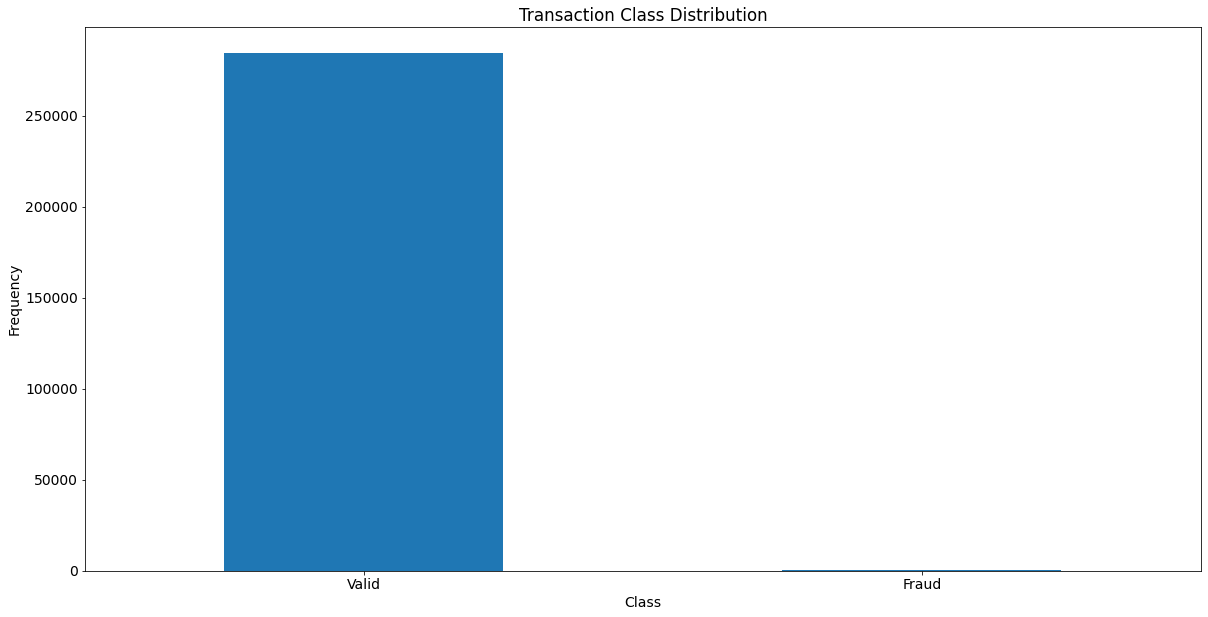

In [ ]:
# plot the graph in between the two classes
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})

classes = df['Class'].value_counts()
classes.plot(kind = 'bar', rot=0)

plt.xticks(range(2), labels=['Valid', 'Fraud'])
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.show()

In [ ]:
# Check the valid transections Amount

valid['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# Check the fraud transections Amount
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# split data into input (X) and output (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X.shape, y.shape

((284807, 30), (284807,))

In [ ]:
# split data into train set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X,y, test_size = 0.3,
                                                                            random_state=0)

In [ ]:
train_features.shape, test_features.shape

((199364, 30), (85443, 30))

In [ ]:
train_labels.shape, test_labels.shape

((199364,), (85443,))

In [ ]:
# normalize the data
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)

train_features = (train_features-train_mean) / train_std
test_features = (test_features-train_mean) / train_std

In [ ]:
train_features[0]

array([ 0.40256043, -0.06741917,  0.06620928, -0.42793636, -0.70335793,
        1.32664106,  1.31029523,  0.40596687,  0.52377954,  0.01539789,
       -0.33314892,  0.51856626,  0.50872963, -0.74450048,  0.51444736,
       -0.17890951, -1.08487117,  0.30826322, -2.10211241, -1.15349585,
       -0.08184582, -0.08403335,  0.00730435,  0.40018973, -4.0759747 ,
       -1.70784662,  0.70055611,  0.76406525,  0.23026665, -0.16569231])

In [ ]:
train_features[5]

array([-0.68582502, -0.63673987,  0.89454887,  0.73021706, -0.14019873,
       -0.008967  , -0.79781949,  0.75249811, -0.32692247,  0.94577281,
        1.20898691, -0.26271532, -1.29208085, -1.93555021, -0.80760582,
        1.3649683 ,  0.25459809, -0.15511706, -0.0264184 , -0.21327713,
        0.72294811, -0.69606566, -1.20190862,  0.09897109,  0.43521721,
       -0.12101573,  0.06871105,  0.54338334, -0.35728797, -0.34935431])

In [49]:
# Model Building


def build_model():
  model = Sequential([
      Dense(10, activation='relu', input_shape=(train_features.shape[-1],)),
      Dense(8, activation='relu'),
      Dense(6, activation='relu'),
      Dense(1, activation="sigmoid")
  ])

# Compilation
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model Training


network = model.fit(train_features, train_labels, epochs=100, batch_size=128,
                    validation_split = 0.2)

Epoch 1/100
1247/1247 [==============================] - 2s 2ms/step - loss: 9.4993e-04 - accuracy: 0.9997 - val_loss: 0.0068 - val_accuracy: 0.9991
Epoch 2/100
1247/1247 [==============================] - 2s 2ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0067 - val_accuracy: 0.9992
Epoch 3/100
1247/1247 [==============================] - 2s 2ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0065 - val_accuracy: 0.9991
Epoch 4/100
1247/1247 [==============================] - 2s 2ms/step - loss: 8.7540e-04 - accuracy: 0.9997 - val_loss: 0.0065 - val_accuracy: 0.9992
Epoch 5/100
1247/1247 [==============================] - 2s 2ms/step - loss: 8.6001e-04 - accuracy: 0.9997 - val_loss: 0.0067 - val_accuracy: 0.9991
Epoch 6/100
1247/1247 [==============================] - 2s 2ms/step - loss: 9.7170e-04 - accuracy: 0.9997 - val_loss: 0.0072 - val_accuracy: 0.9991
Epoch 7/100
1247/1247 [==============================] - 2s 2ms/step - loss: 8.2122e-04 - accuracy: 0.9997 - val_l

In [ ]:
# store history in the dataframe
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.000913,0.999693,0.006249,0.999072,95
96,0.001147,0.999655,0.005900,0.999223,96
97,0.000951,0.999693,0.006494,0.999172,97
98,0.000885,0.999718,0.006527,0.999047,98
99,0.000952,0.999668,0.006975,0.999022,99


In [ ]:
# store history in the dataframe
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.000913,0.999693,0.006249,0.999072,95
96,0.001147,0.999655,0.005900,0.999223,96
97,0.000951,0.999693,0.006494,0.999172,97
98,0.000885,0.999718,0.006527,0.999047,98
99,0.000952,0.999668,0.006975,0.999022,99


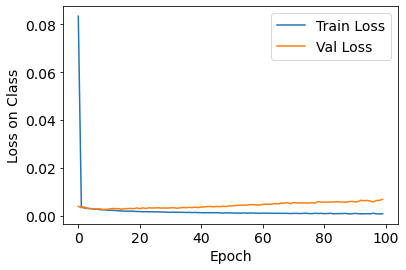

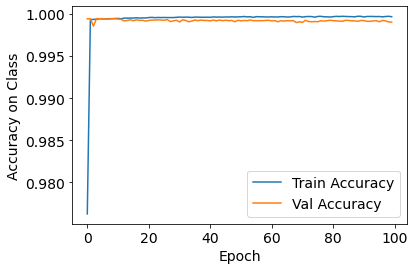

In [ ]:
# plot loss and accuracy on validation data

# loss
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss on Class')
plt.plot(hist['epoch'], hist['loss'], label = 'Train Loss')
plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
plt.legend()

# accuracy
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy on Class')
plt.plot(hist['epoch'], hist['accuracy'], label = 'Train Accuracy')
plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
plt.legend()

In [ ]:
# Analyze Imbalance In Labels

# count number of occurrences of each value in array of non-negative ints
counts = np.bincount(train_labels)
fraud_ratio = 100 * float(counts[1]) / len(train_labels)
print(f'Valid transections: {counts[0]}, Fraud transections": {counts[1]}')
print('Total fraud samples in training data: {:.2f}%'.format(fraud_ratio))

# weight distribution for valid and fraud transections for training
weight_for_valid = 1.0 / counts[0]    
weight_for_fraud = 1.0 / counts[1]

Valid transections: 199019, Fraud transections": 345
Total fraud samples in training data: 0.17%


In [ ]:
# Build Another Model

# model definition with dropout layers
from keras.layers import Dropout

def build_model2():
  model = Sequential([
          Dense(256, activation="relu", input_shape=(train_features.shape[-1],)),
          Dense(256, activation="relu"),
          # first dropout layer
          Dropout(0.3),
          Dense(256, activation="relu"),
          # second dropout layer
          Dropout(0.3),
          Dense(1, activation="sigmoid")])

  return model

In [ ]:
model = build_model2()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               7936      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
________________________________________________

In [ ]:
# Train model with 20% Validation and class weight arguments

from keras import metrics
from keras import optimizers

# classification metrics based on True/False positives & negatives
metrics = [
    metrics.FalseNegatives(name="fn"),
    metrics.FalsePositives(name="fp"),
    metrics.TrueNegatives(name="tn"),
    metrics.TruePositives(name="tp"),
    metrics.Precision(name="precision"),
    metrics.Recall(name="recall")]

# compile the model network with optimizer learning rate
model.compile(optimizer=optimizers.Adam(0.01), loss='binary_crossentropy', metrics=metrics)

# add callbacks in the training loop
callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]

# assign class weight for fruad and valid 
class_weight = {0: weight_for_valid, 1: weight_for_fraud}

# train the model
history = model.fit(train_features, train_labels, batch_size=2048, epochs=30, verbose=2,
          callbacks=callbacks, validation_split=0.2, class_weight=class_weight)

Epoch 1/30
78/78 - 7s - loss: 2.7881e-06 - fn: 29.0000 - fp: 17333.0000 - tn: 141893.0000 - tp: 236.0000 - precision: 0.0134 - recall: 0.8906 - val_loss: 0.0905 - val_fn: 7.0000 - val_fp: 454.0000 - val_tn: 39339.0000 - val_tp: 73.0000 - val_precision: 0.1385 - val_recall: 0.9125
Epoch 2/30
78/78 - 4s - loss: 1.6477e-06 - fn: 24.0000 - fp: 4167.0000 - tn: 155059.0000 - tp: 241.0000 - precision: 0.0547 - recall: 0.9094 - val_loss: 0.1482 - val_fn: 4.0000 - val_fp: 1581.0000 - val_tn: 38212.0000 - val_tp: 76.0000 - val_precision: 0.0459 - val_recall: 0.9500
Epoch 3/30
78/78 - 4s - loss: 1.6177e-06 - fn: 20.0000 - fp: 5930.0000 - tn: 153296.0000 - tp: 245.0000 - precision: 0.0397 - recall: 0.9245 - val_loss: 0.0926 - val_fn: 7.0000 - val_fp: 608.0000 - val_tn: 39185.0000 - val_tp: 73.0000 - val_precision: 0.1072 - val_recall: 0.9125
Epoch 4/30
78/78 - 4s - loss: 1.7587e-06 - fn: 21.0000 - fp: 6504.0000 - tn: 152722.0000 - tp: 244.0000 - precision: 0.0362 - recall: 0.9208 - val_loss: 0.066

In [ ]:
# evaluate the model on test set
score = model.evaluate(test_features, test_labels)
print('Loss: {}\nFalse -ve: {}\nFalse +ve: {}\nTrue -ve: {}\nTrue +ve: {}\nPrecision: {}\nRecall: {}'.format(score[0], score[1], score[2], score[3], score[4], score[5], score[6]))

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0407 - fn: 17.0000 - fp: 1540.0000 - tn: 83756.0000 - tp: 130.0000 - precision: 0.0778 - recall: 0.8844
Loss: 0.040741629898548126
False -ve: 17.0
False +ve: 1540.0
True -ve: 83756.0
True +ve: 130.0
Precision: 0.07784431427717209
Recall: 0.884353756904602


In [ ]:
# make predictions on test features
test_pred = model.predict(test_features)

# although this is not recommended because it impacts the overall result accuracy
test_pred = test_pred>0.5 

In [ ]:
# check how the model has performed
from sklearn.metrics import classification_report
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.08      0.88      0.14       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443



Accuracy on test data: 0.9818


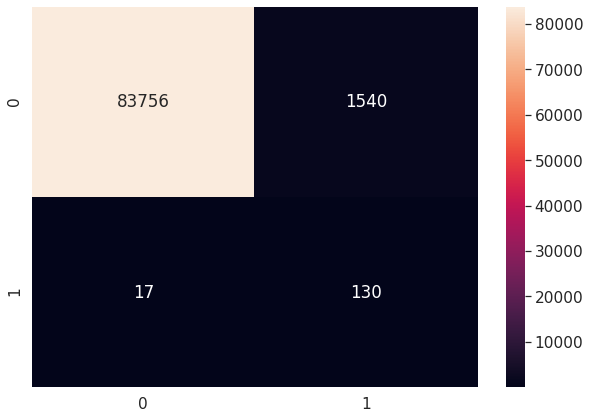

In [ ]:
# visualize the confusion matrix, where rows are true values and cols are predictions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# make the Confusion Matrix
conMatrix = confusion_matrix(test_labels, test_pred)

# store in the dataframe
confusion_df = pd.DataFrame(conMatrix, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_df, annot=True, fmt='g')

# check accuracy
print("Accuracy on test data: %0.4f" % accuracy_score(test_labels, test_pred))

In [ ]:
# roc-auc performance measurement
from sklearn.metrics import roc_auc_score
roc_auc_score(test_labels,test_pred)

0.9331494837664948

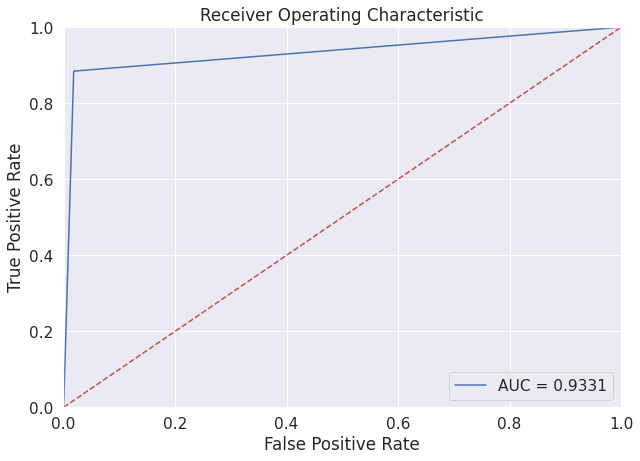

In [ ]:
# plot roc curve to understand the performance of the binary classifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(test_labels, test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [ ]:
# SAVE MODEL

# save model and architecture
model.save('card-detector.h5')
print('model saved')

model saved
